#  Supervised Classification Algorithm Project

**Crop_Prediction_Model**

**Context**

This dataset is focused on predicting the various CROPS to assist farmers in making informed decision about crop selection
in advance by analyzing factors like state(assuming same weater and soil parameters in particular state),
season,crop types using various supervised machine learning techniques.
This helps the farmers to know the crop in advance to plan and choose a crop that would give a better yeild.

***Project Contents***

Import Libraries

Import Dataset

Analysing Data

Data Overview

Transforming Data to required format (Using Mean,Median,Mode)

Label Encoding

Feature Scaling

Model Comparison

Training Models


***Apply Supervised Classification Algorithm***

1)Logistic Regression

2)K-Nearest Neighbors(KNN)

3)Desicion Tree

4)Random Forest Algorithm

5)Support Vector Machine(SVM)

**Here are the explanation of the columns in the "indian crop_dataset.csv"**


N_SOIL: ration of Nitrogen content in soil

P_SOIL: ration of Phosphorous content in soil

K_SOIL: ratio of Potassium content in soil

TEMPERATURE: temperature in daily bases

HUMIDITY: relative humidity in %

PH: ph value of the rainfall in mm

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

**Analysing Data**

In [4]:
df=pd.read_csv("indian crop_dataset.csv")
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [5]:
df.shape

(2200, 10)

In [6]:
df.keys()

Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL', 'STATE', 'CROP_PRICE', 'CROP'],
      dtype='object')

In [7]:
#List of Various Crop
df['CROP'].value_counts()

CROP
Mango          100
Banana         100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Maize          100
Pomegranate    100
Cotton         100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
Jute           100
ChickPea       100
Coconut        100
Coffee          99
KidneyBeans     97
Rice            97
Name: count, dtype: int64

In [8]:
#List of Different State 
df['STATE'].value_counts()

STATE
Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh        98
Odisha                  86
Haryana                 65
Assam                   53
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: count, dtype: int64

In [9]:
#Turn the Statistical Summary of the Data
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2165.000000,2177.000000,2196.000000,2190.000000,2190.000000,2200.000000,2200.000000
mean,50.551818,53.115473,48.443730,25.621042,71.618327,6.473828,103.463655,2689.228182
std,36.917334,33.179796,50.832641,5.066702,22.167854,0.772191,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.770662,60.403553,5.974468,64.551686,950.000000
50%,37.000000,50.000000,32.000000,25.605637,80.511845,6.429583,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.563593,89.995609,6.925182,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2165 non-null   float64
 2   K_SOIL       2177 non-null   float64
 3   TEMPERATURE  2196 non-null   float64
 4   HUMIDITY     2190 non-null   float64
 5   ph           2190 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2191 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2193 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 172.0+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
# Here we count all the total missing valuses
df.isnull().sum()

N_SOIL          0
P_SOIL         35
K_SOIL         23
TEMPERATURE     4
HUMIDITY       10
ph             10
RAINFALL        0
STATE           9
CROP_PRICE      0
CROP            7
dtype: int64

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Heat-Map**

<Axes: >

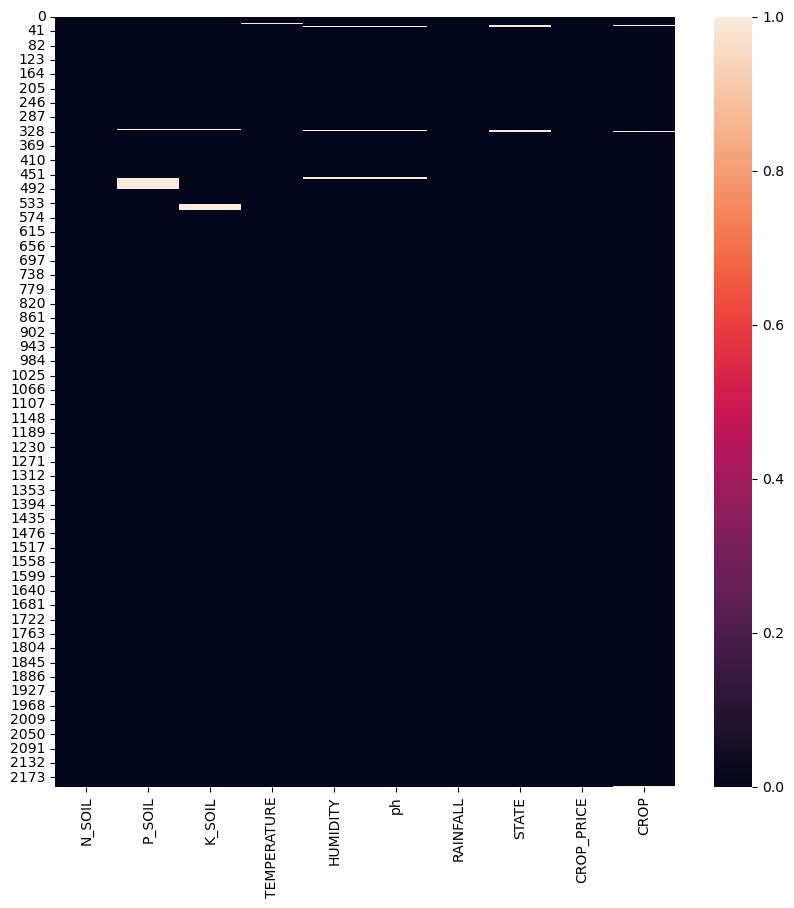

In [13]:
#Heatmap for visulazing null values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())


In [14]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var

N_SOIL         0.000000
P_SOIL         1.590909
K_SOIL         1.045455
TEMPERATURE    0.181818
HUMIDITY       0.454545
ph             0.454545
RAINFALL       0.000000
STATE          0.409091
CROP_PRICE     0.000000
CROP           0.318182
dtype: float64

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Distribution Between two features(diagonal)**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


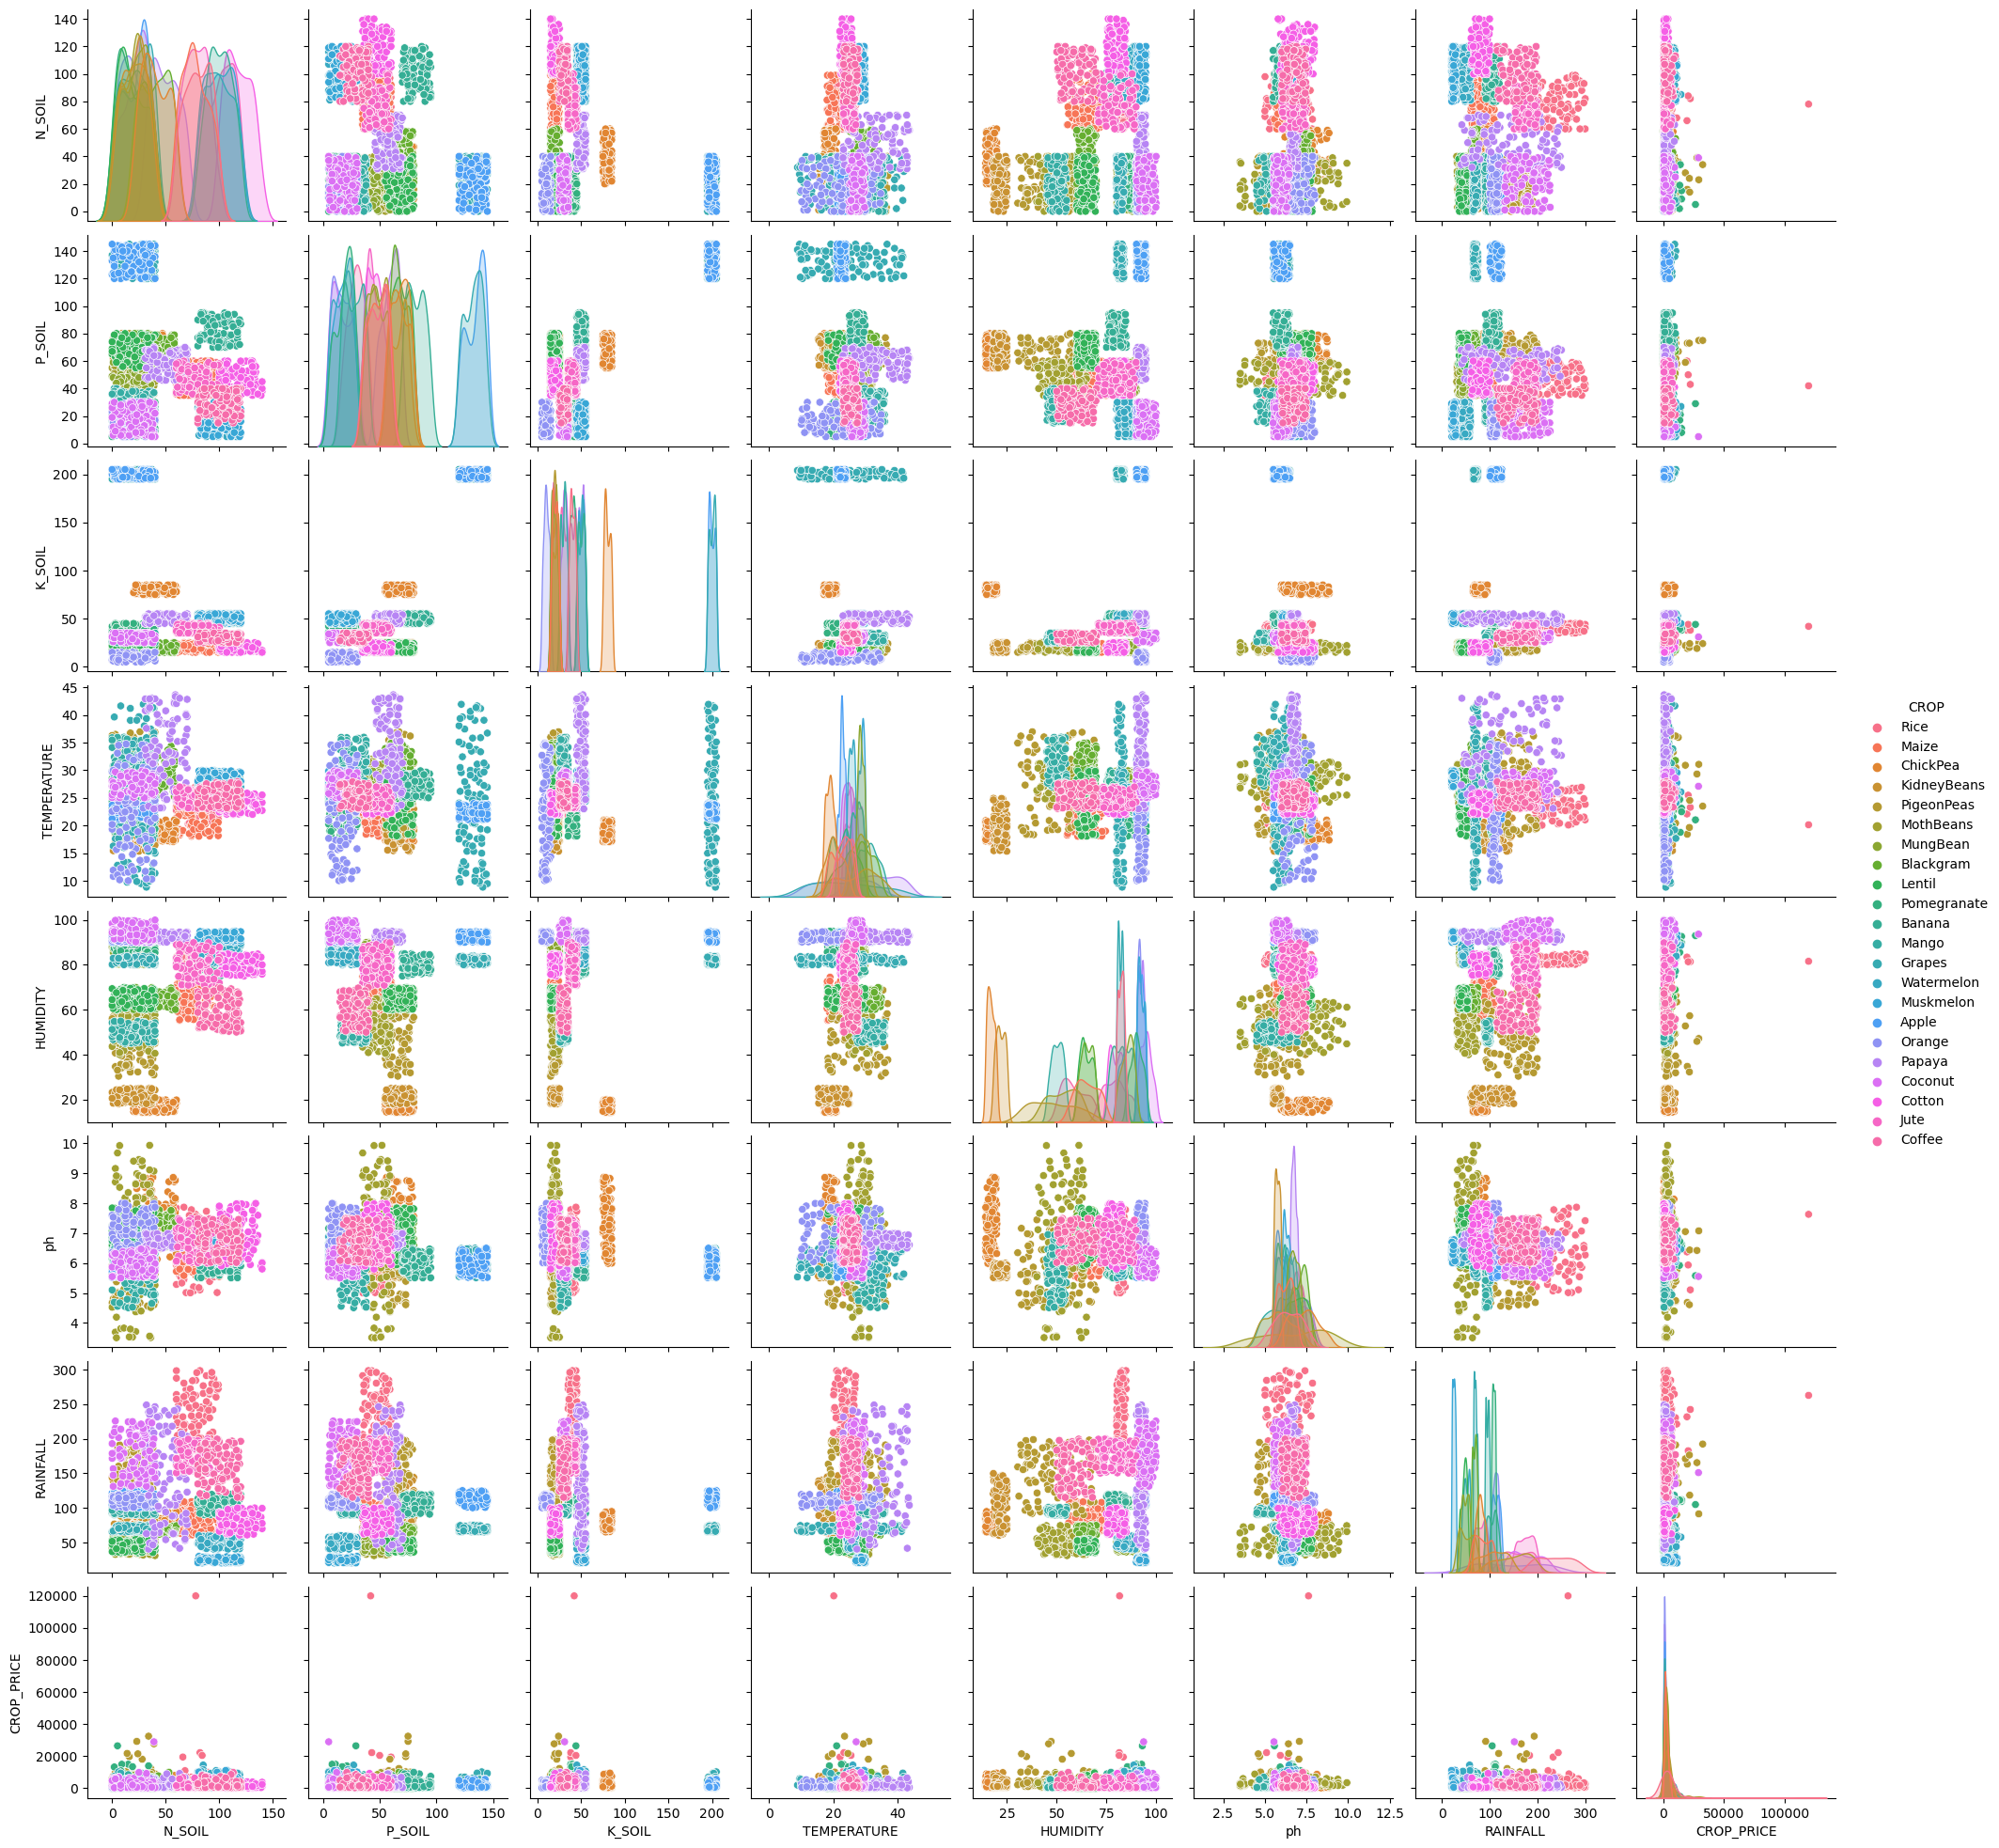

In [13]:
sns.pairplot(df,hue='CROP')

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [14]:
#This Dataset has many missing values, and that indicative of 
# invalide or null values
#There is need to use an Mean,Median and Mode

***Now select data type which has integer & float***

In [14]:
df1=df.select_dtypes(include=['int64','float64'])
df1.head()
#Now df1 contains all the numberical column

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,7000
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,5000
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,7000
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,7000
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,120000


In [15]:
df1.isnull().sum()

N_SOIL          0
P_SOIL         35
K_SOIL         23
TEMPERATURE     4
HUMIDITY       10
ph             10
RAINFALL        0
CROP_PRICE      0
dtype: int64

<Axes: >

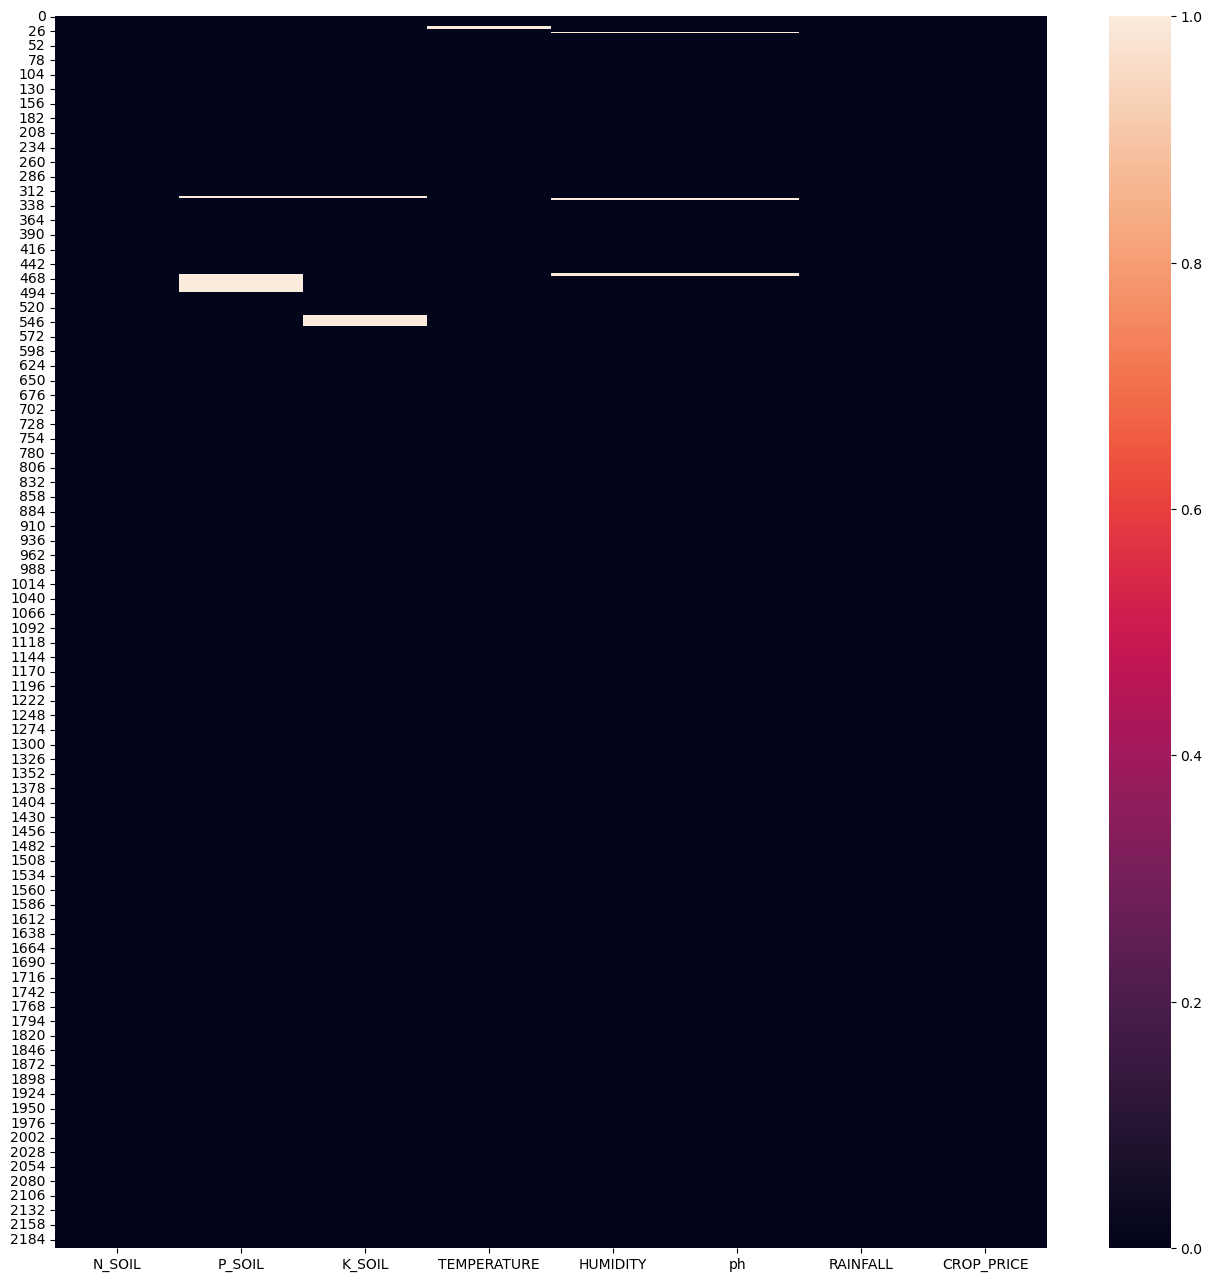

In [16]:
#Heatmap for integer and float datatype missing value
plt.figure(figsize=(16,16))
sns.heatmap(df1.isnull())

In [17]:
df2 = [var for var in df1.columns 
                   if df1[var].isnull().sum()>0]
df2

# We get  variable names that has missing values

['P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph']

C:\Users\Neha_\AppData\Local\Temp\ipykernel_16780\1347159801.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,
C:\Users\Neha_\AppData\Local\Temp\ipykernel_16780\1347159801.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,
C:\Users\Neha_\AppData\Local\Tem

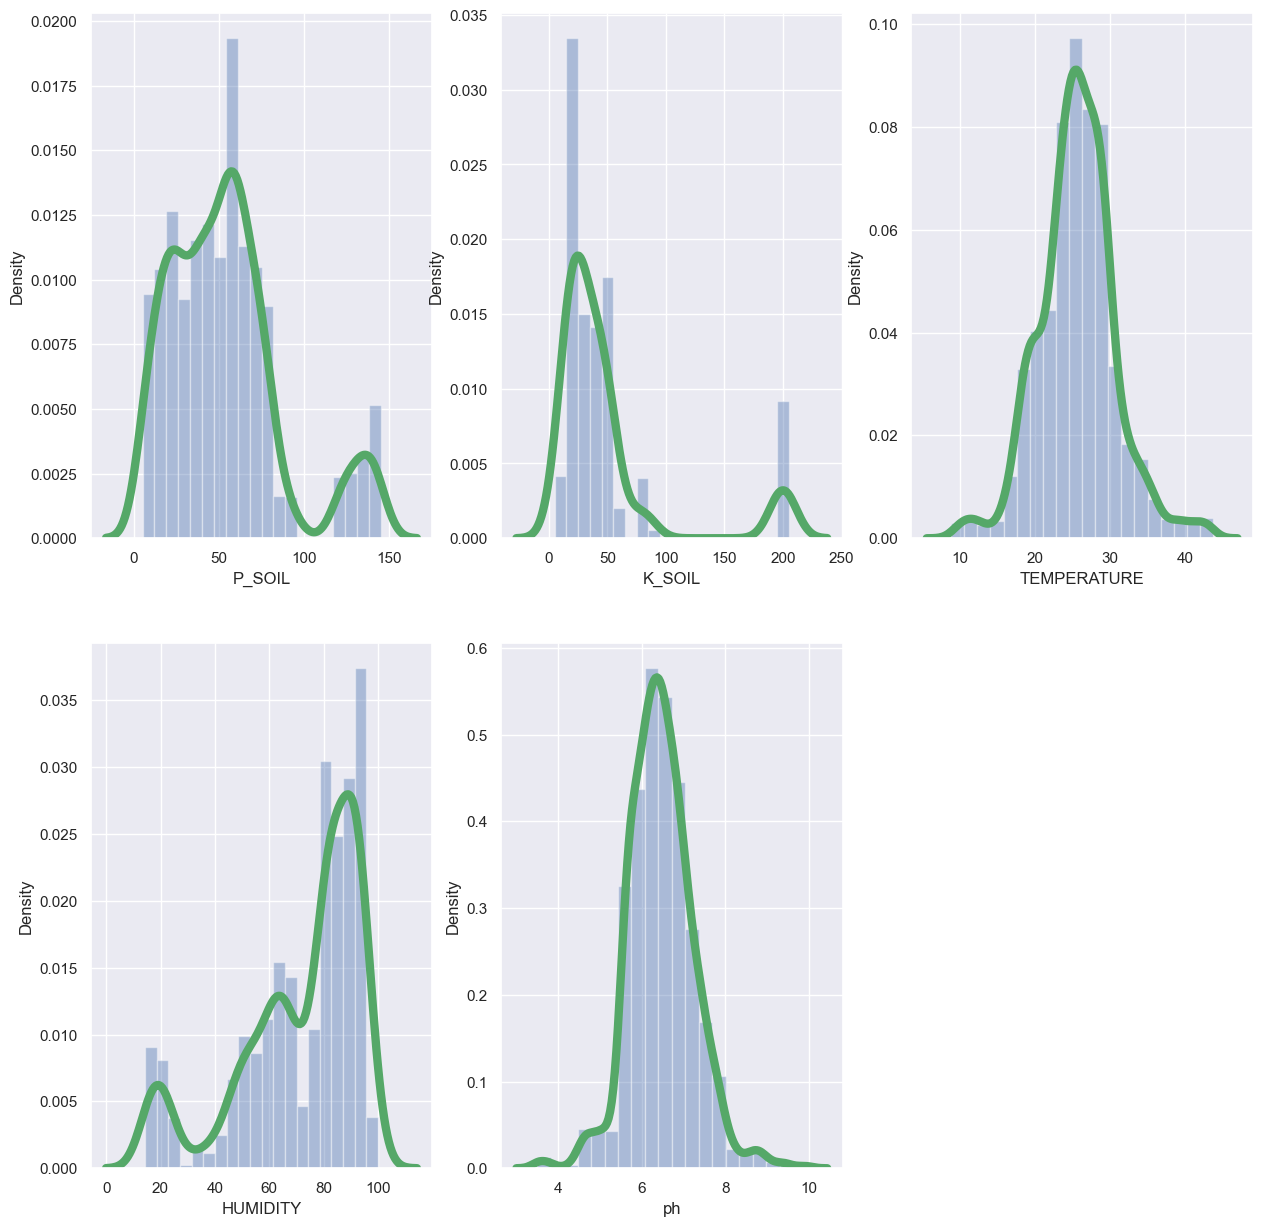

In [18]:
plt.figure(figsize=(15,15))
sns.set()
for i, var in enumerate(df2): 

    plt.subplot(2,3,i+1) 

    
    sns.distplot(df1[var], bins=20,
                 kde_kws={'linewidth':6, 'color':'g'})

In [19]:
df1_mean = df1.fillna(df1.mean()) 
#fillna() is used to fill missing values 
### now we fill it using mean

df1_mean.isnull().sum().sum()

0

C:\Users\Neha_\AppData\Local\Temp\ipykernel_16780\3961679411.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
C:\Users\Neha_\AppData\Local\Temp\ipykernel_16780\3961679411.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

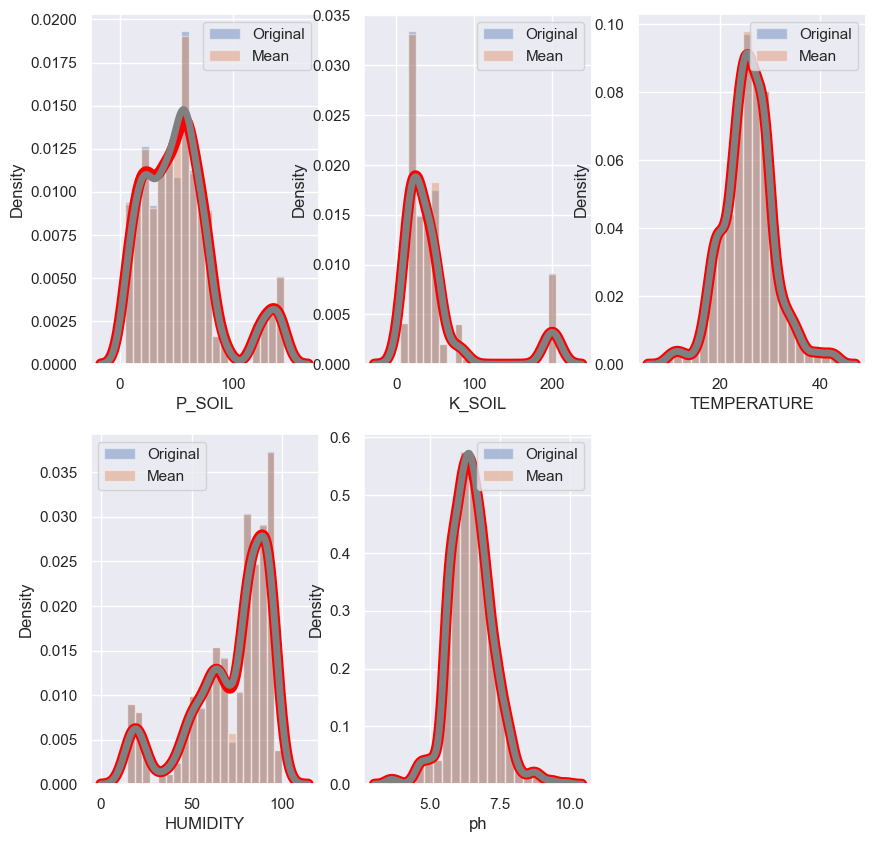

In [20]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df2):
    plt.subplot(2,3,i+1)
    sns.distplot(df1[var], bins=20, kde_kws={'linewidth':8, 'color':'red'}, label="Original",) # original dataframe
    sns.distplot(df1_mean[var], bins=20, kde_kws={'linewidth':5, 'color':'grey'},label="Mean",)
    plt.legend()

In [21]:
df1_median = df1.fillna(df1.median())
df1_median.isnull().sum().sum()

0

C:\Users\Neha_\AppData\Local\Temp\ipykernel_16780\3788744668.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
C:\Users\Neha_\AppData\Local\Temp\ipykernel_16780\3788744668.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

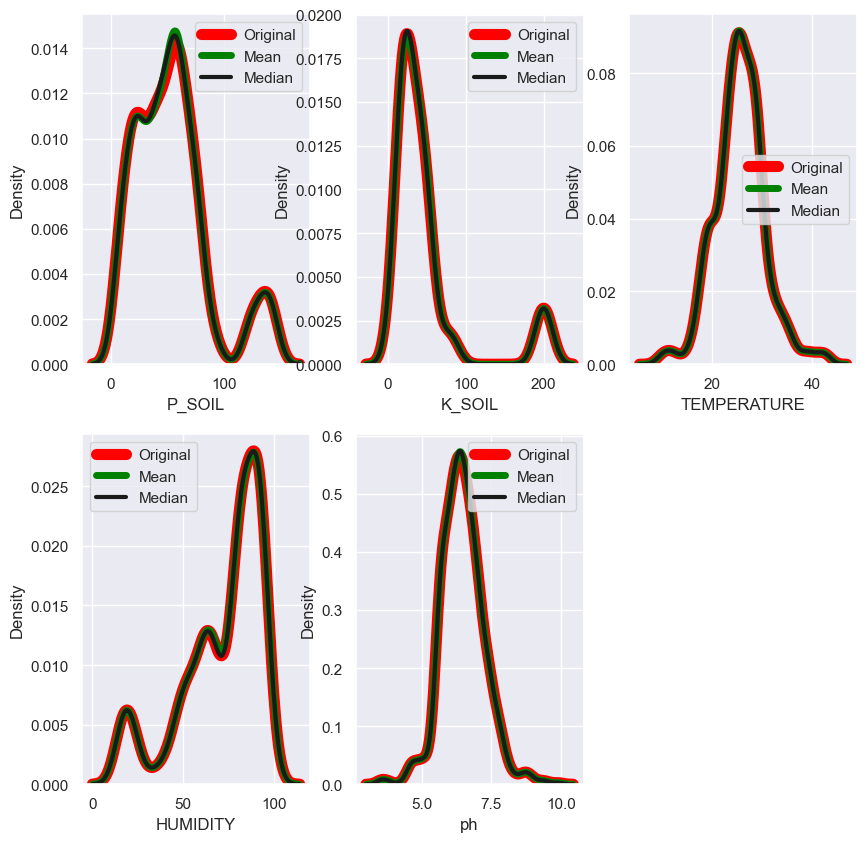

In [22]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(df2):
    plt.subplot(2,3,i+1)
    sns.distplot(df1[var], bins=20,hist=False, kde_kws={'linewidth':8, 'color':'red'}, label="Original",)
    sns.distplot(df1_mean[var], bins=20,hist=False, kde_kws={'linewidth':5, 'color':'green'},label="Mean",)
    sns.distplot(df1_median[var], bins=20,hist=False, kde_kws={'linewidth':3, 'color':'k'},label="Median",)
    plt.legend()

In [23]:
df.update(df1_median)
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [24]:
df.update(df1_mean)

df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

***Now select data type which has Object***

In [25]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,STATE,CROP
0,Andaman and Nicobar,Rice
1,Andaman and Nicobar,Rice
2,Andaman and Nicobar,Rice
3,Andaman and Nicobar,Rice
4,Andaman and Nicobar,Rice


<Axes: >

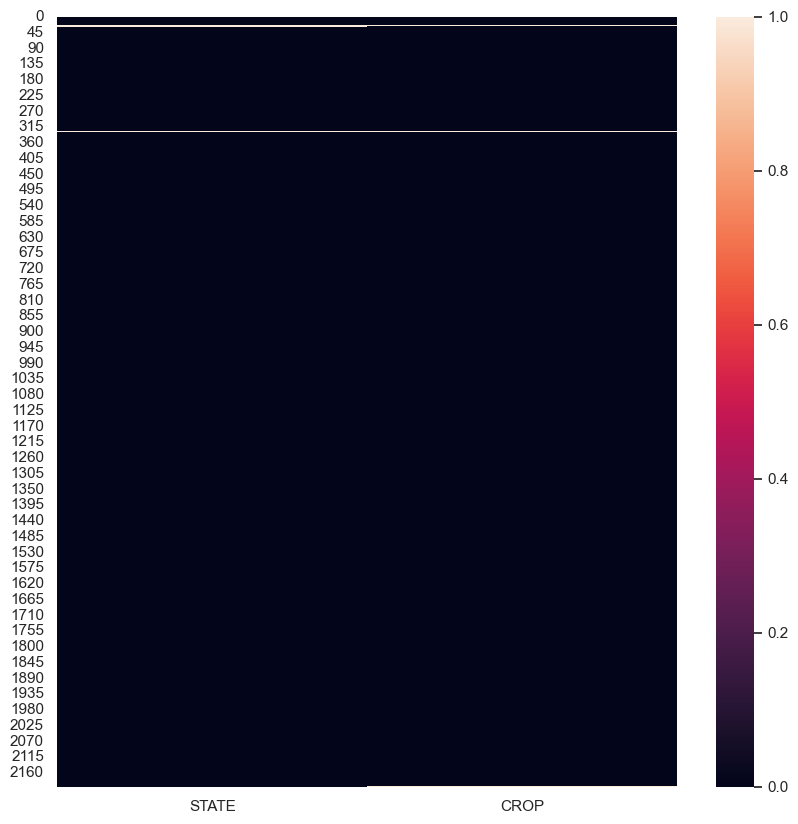

In [26]:
#Heatmap for object datatype missing value
plt.figure(figsize=(10,10))
sns.heatmap(cat_vars.isnull())

In [27]:
cat_vars.isnull().sum()

STATE    9
CROP     7
dtype: int64

In [28]:
cat_vars.isnull().mean()*100


STATE    0.409091
CROP     0.318182
dtype: float64

In [29]:
#fill STATE Values with mode
cat_vars['STATE'].value_counts()

STATE
Uttar Pradesh          574
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh        98
Odisha                  86
Haryana                 65
Assam                   53
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Andhra Pradesh           7
Pondicherry              7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Jammu and Kashmir        3
Goa                      3
Name: count, dtype: int64

In [30]:
cat_vars['STATE'].mode()

0    Uttar Pradesh
Name: STATE, dtype: object

In [31]:
cat_vars['STATE'].fillna(cat_vars['STATE'].mode()[0])

0       Andaman and Nicobar
1       Andaman and Nicobar
2       Andaman and Nicobar
3       Andaman and Nicobar
4       Andaman and Nicobar
               ...         
2195            West Bengal
2196            West Bengal
2197            West Bengal
2198            West Bengal
2199            West Bengal
Name: STATE, Length: 2200, dtype: object

In [32]:
cat_vars['STATE'].fillna(cat_vars['STATE'].mode()[0]).value_counts()

STATE
Uttar Pradesh          583
Kerala                 274
Tamil Nadu             183
Punjab                 180
Maharashtra            162
West Bengal            124
Gujarat                113
Himachal Pradesh        98
Odisha                  86
Haryana                 65
Assam                   53
Manipur                 52
Madhya Pradesh          44
Rajasthan               41
Karnataka               36
Uttrakhand              21
Tripura                 18
Telangana               15
Andaman and Nicobar     15
Pondicherry              7
Andhra Pradesh           7
Meghalaya                6
Nagaland                 6
Chattisgarh              5
Goa                      3
Jammu and Kashmir        3
Name: count, dtype: int64

In [33]:
#fill CROP values with mode
cat_vars['CROP'].value_counts()

CROP
Mango          100
Banana         100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Maize          100
Pomegranate    100
Cotton         100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
Jute           100
ChickPea       100
Coconut        100
Coffee          99
KidneyBeans     97
Rice            97
Name: count, dtype: int64

In [34]:
cat_vars['CROP'].mode()

0           Apple
1          Banana
2       Blackgram
3        ChickPea
4         Coconut
5          Cotton
6          Grapes
7            Jute
8          Lentil
9           Maize
10          Mango
11      MothBeans
12       MungBean
13      Muskmelon
14         Orange
15         Papaya
16     PigeonPeas
17    Pomegranate
18     Watermelon
Name: CROP, dtype: object

In [35]:
cat_vars['CROP'].fillna(cat_vars['CROP'].mode()[0])

0         Rice
1         Rice
2         Rice
3         Rice
4         Rice
         ...  
2195    Coffee
2196    Coffee
2197    Coffee
2198    Coffee
2199     Apple
Name: CROP, Length: 2200, dtype: object

In [36]:
cat_vars['CROP'].fillna(cat_vars['CROP'].mode()[0]).value_counts()

CROP
Apple          107
Banana         100
Pomegranate    100
Papaya         100
Orange         100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Lentil         100
Cotton         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
Jute           100
ChickPea       100
Maize          100
Coconut        100
Coffee          99
KidneyBeans     97
Rice            97
Name: count, dtype: int64

In [37]:
cat_vars_copy= cat_vars.copy()

for var in cat_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

STATE = Uttar Pradesh
CROP = Apple


In [38]:
cat_vars_copy.isnull().sum().sum()

0

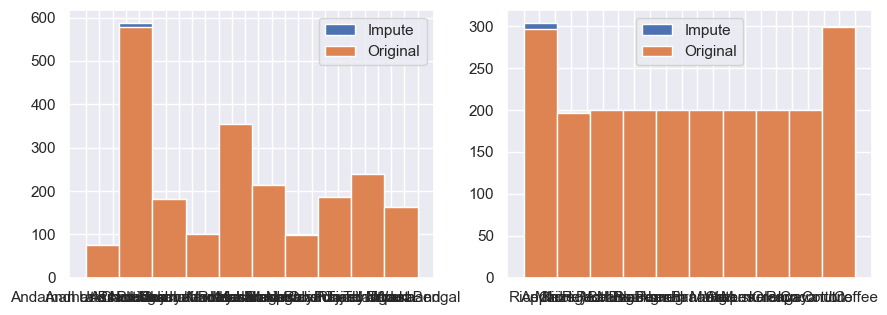

In [39]:
plt.figure(figsize=(16,16))
for i,var in enumerate(cat_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [40]:
# Replace the Original Dataset with the Mean And Mode

In [41]:
df.update(cat_vars_copy)
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [ ]:
# Using Mean,Mode,Median Fill All Missing Values 

<Axes: >

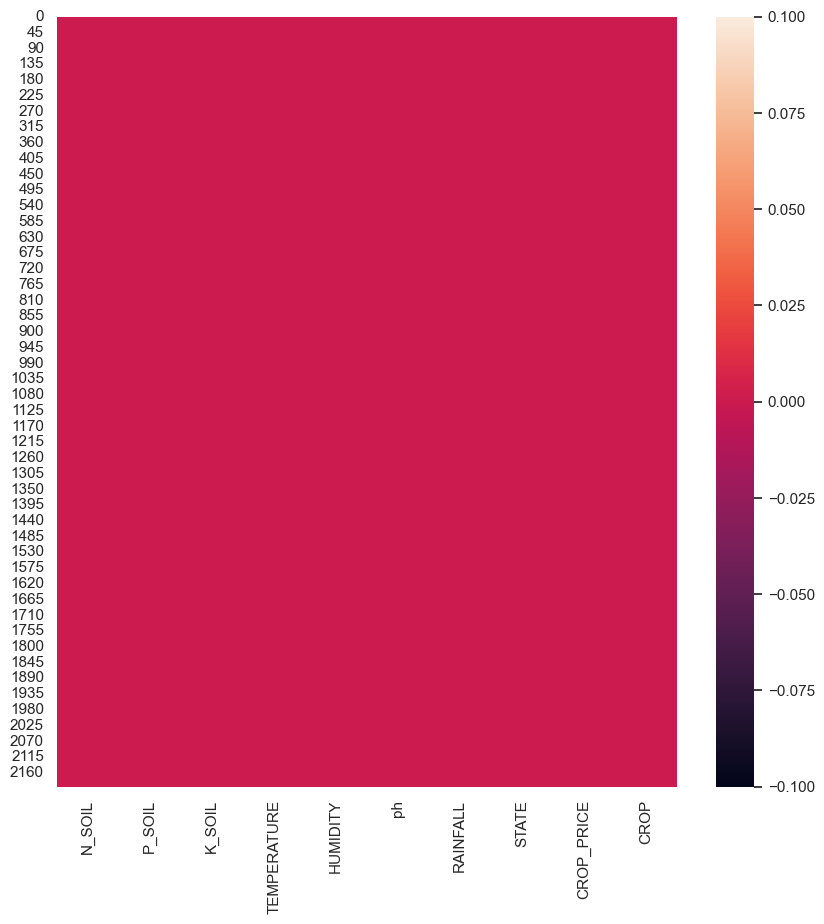

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [44]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   float64
 2   K_SOIL       2200 non-null   float64
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 172.0+ KB


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



# Label The Data

In [46]:
df['STATE'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Uttar Pradesh',
       'Chattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttrakhand', 'West Bengal'], dtype=object)

In [47]:
df['CROP'].unique()

array(['Rice', 'Apple', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Orange',
       'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'], dtype=object)

*Label on STATE column*

In [49]:
#List of Different STATE
#Create Dictonary
STATE_NAME={
'Andaman and Nicobar':0,    
'Andhra Pradesh':1,
'Assam':2,
'Chattisgarh':3,
'Goa':4,
'Gujarat':5, 
'Haryana':6, 
'Himachal Pradesh':7,
'Jammu and Kashmir':8,
'Karnataka':9, 
'Kerala':10,
'Madhya Pradesh':11, 
'Maharashtra':12, 
'Manipur':13,
'Meghalaya':14,
'Nagaland':15, 
'Odisha':16,
'Pondicherry':17,
'Punjab':18,
'Rajasthan':19,
'Tamil Nadu':20,
'Telangana':21,
'Tripura':22,
'Uttar Pradesh':23,
'Uttrakhand':24,
'West Bengal':25,
}
#mapping
df['STATE']=df['STATE'].map(STATE_NAME)

In [50]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,0,7000,Rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,0,5000,Rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,0,7000,Rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,0,7000,Rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,0,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,25,1000,Coffee
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,25,800,Coffee
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,25,560,Coffee
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,25,1500,Coffee


*Label on CROP Column*

In [51]:
#List of Various Crops
CROPS_NAME={
'Apple':0,
'Banana':1,
'Blackgram':2,
'ChickPea':3,
'Coconut':4, 
'Coffee':5, 
'Cotton':6, 
'Grapes':7,
'Jute':8,
'KidneyBeans':9,
'Lentil':10, 
'Maize':11,
'Mango':12,
'MothBeans':13,
'MungBean':14,
'Muskmelon':15,
'Orange':16, 
'Papaya':17, 
'PigeonPeas':18, 
'Pomegranate':19,
'Rice':20, 
'Watermelon':21,
}
#mapping
df['CROP']=df['CROP'].map(CROPS_NAME)

In [52]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,0,7000,20
1,85,58.0,41.0,21.770462,80.319644,7.038096,226.655537,0,5000,20
2,60,55.0,44.0,23.004459,82.320763,7.840207,263.964248,0,7000,20
3,74,35.0,40.0,26.491096,80.158363,6.980401,242.864034,0,7000,20
4,78,42.0,42.0,20.130175,81.604873,7.628473,262.717340,0,120000,20
...,...,...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,25,1000,5
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,25,800,5
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,25,560,5
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,25,1500,5


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Spliting Data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x=df.drop('CROP',axis=1)

y=df["CROP"]

print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (2200, 9)
Shape of y= (2200,)


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#test_size=0.2 it means we use 20% of dataset for test
print('Shape of x_train=',x_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of x_test=',x_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of x_train= (1760, 9)
Shape of y_train= (1760,)
Shape of x_test= (440, 9)
Shape of y_test= (440,)


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Feature Scaling

**Normalization**

In [56]:
from sklearn.preprocessing import MinMaxScaler


In [57]:
 min_max_scaler = MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)


In [58]:
x_train_minmax

array([[0.12142857, 0.07857143, 0.045     , ..., 0.29685161, 0.92      ,
        0.02081701],
       [0.26428571, 0.52857143, 0.07      , ..., 0.17630752, 0.48      ,
        0.03040884],
       [0.05      , 0.48571429, 0.1       , ..., 0.08931844, 0.52      ,
        0.06081768],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.28719815, 0.72      ,
        0.01248354],
       [0.07857143, 0.85      , 0.995     , ..., 0.18346657, 0.8       ,
        0.0099835 ],
       [0.22857143, 0.52142857, 0.085     , ..., 0.11879596, 0.48      ,
        0.02831714]])

In [59]:
x_test_minmax = min_max_scaler.transform(x_test)
x_test_minmax

array([[0.72142857, 0.08571429, 0.21      , ..., 0.021381  , 0.84      ,
        0.03544226],
       [0.7       , 0.02142857, 0.23      , ..., 0.10449492, 0.8       ,
        0.04781746],
       [0.42142857, 0.40714286, 0.22      , ..., 0.33938901, 0.92      ,
        0.03415057],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.18741185, 0.92      ,
        0.0097335 ],
       [0.82857143, 0.33571429, 0.07      , ..., 0.16793744, 0.92      ,
        0.00415007],
       [0.03571429, 0.34368195, 0.075     , ..., 0.48530014, 0.4       ,
        0.02248371]])

In [60]:
 min_max_scaler.scale_

array([7.14285714e-03, 7.14285714e-03, 5.00000000e-03, 2.86945542e-02,
       1.16674411e-02, 1.55512811e-01, 3.59453493e-03, 4.00000000e-02,
       8.33347222e-06])

In [61]:
min_max_scaler.min_

array([ 0.00000000e+00, -3.57142857e-02, -2.50000000e-02, -2.53248802e-01,
       -1.66532653e-01, -5.45033883e-01, -7.31847724e-02,  0.00000000e+00,
       -1.66669444e-05])

**StandardScaler**

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
sc.fit(x_train)

StandardScaler()

In [64]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [65]:
sc.mean_

array([  50.68636364,   53.18579677,   48.37423633,   25.58563811,
         71.70731868,    6.48071735,  102.66125502,   15.99545455,
       2702.84431818])

In [66]:
sc.scale_

array([3.72873278e+01, 3.31552443e+01, 5.09989553e+01, 5.08660557e+00,
       2.18657133e+01, 7.69060315e-01, 5.49363808e+01, 6.91876416e+00,
       3.93560382e+03])

In [67]:
x_train_sc

array([[-0.9034266 , -1.12156606, -0.67401844, ...,  0.0051497 ,
         1.01239835, -0.05154084],
       [-0.36705134,  0.77858583, -0.57597722, ..., -0.60529057,
        -0.57748096,  0.24091746],
       [-1.17161422,  0.59761898, -0.45832775, ..., -1.04580687,
        -0.43294647,  1.16809412],
       ...,
       [-1.06433917, -0.51834324, -0.34067828, ..., -0.04373582,
         0.28972594, -0.30563145],
       [-1.06433917,  2.13583717,  3.05154807, ..., -0.56903684,
         0.57879491, -0.38185864],
       [-0.50114515,  0.74842468, -0.51715248, ..., -0.89653148,
        -0.57748096,  0.17714072]])

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Apply Supervised Classification Algorithm

1)Support Vector Classification

**Train Support Vector Classification Model**

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [69]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(x_train,y_train)

SVC()

In [70]:
classification_rbf.score(x_test,y_test)

0.08636363636363636

**Tune Parameters**

*Regularization (C)*

In [71]:
model_g=SVC(C=0.1)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.05

*Gamma*

In [72]:
model_g=SVC(gamma='scale')
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.08636363636363636

*SVC with kernel Polynomial*

In [73]:
classification_poly=SVC(kernel='poly',degree=2)
classification_poly.fit(x_train_sc,y_train)

classification_poly.score(x_test_sc,y_test)

0.9727272727272728

*SVC with Kernel Linear*

In [74]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(x_train_sc,y_train)

classification_linear.score(x_test_sc,y_test)

0.9863636363636363

*Predict the Value of the CROP*

In [75]:
y_test.iloc[-1]

18

In [76]:
#PigeonPeas:18

In [80]:
y_pred=classification_rbf.predict(x_test)
y_pred

array([13, 13, 13, 16, 14, 16, 16, 13, 16, 16, 16, 13, 13, 16, 21, 13, 16,
       14, 16, 21, 13, 16, 16, 11, 16, 16, 14, 16, 13, 16, 19, 16, 16, 16,
       16, 14, 21, 11, 21, 16, 16, 16, 14, 13, 16, 16, 14, 13, 21, 13, 16,
       14, 14, 13, 14, 21, 16, 16, 16, 16, 16, 18, 16, 16, 11, 21, 16, 13,
       16, 13, 14, 14, 16, 21, 16, 16, 13, 16, 21, 16, 14, 21, 16, 11, 16,
       16, 13, 13, 16, 14, 14, 11, 16, 21, 14, 16, 13, 16, 14, 14, 13, 14,
       16, 11, 13, 16, 11, 16, 16, 14, 21, 16, 14, 16, 16, 16, 14, 16, 14,
       16, 21, 14, 16, 14, 13, 16, 11, 16, 14, 16, 21, 21, 16, 13, 16, 16,
       16, 21, 16, 16, 11, 13, 13, 14, 16, 13,  0, 11, 14, 13, 13, 13, 14,
       13, 13, 13, 13, 16, 11, 16, 16,  0, 16, 14, 13, 16, 14, 16, 11,  0,
       13, 16, 14, 16, 13, 16, 16,  0, 11, 16, 16, 16, 14, 16, 16, 13, 16,
       13, 14, 14, 16, 13, 16, 13, 16, 16, 14, 14, 14, 16, 13, 21, 16, 13,
       14, 13, 14, 16, 18, 14, 16, 14, 16, 16,  0, 13, 13, 13, 13, 11, 14,
       16, 16, 16, 16, 14

*Apply Confusion Matrix*

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

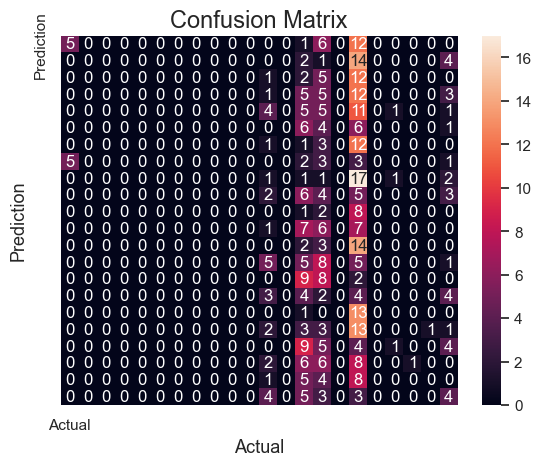

In [82]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Actual'],
            yticklabels=['Prediction'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.08636363636363636


In [85]:
precision=precision_score(y_test,y_pred,average='micro')
print(precision)

0.08636363636363636


In [86]:
recall=recall_score(y_test,y_pred,average='micro')
print(recall)

0.08636363636363636


In [87]:
F1_score=f1_score(y_test,y_pred,average='micro')
print(F1_score)

0.08636363636363636


*K-Fold Cross Validation Technique*

In [77]:
score_svc =cross_val_score(SVC(gamma='auto'), x,y,cv=5)
print(score_svc)
print("Avg:",np.average(score_svc))

[0.05227273 0.05454545 0.05454545 0.05681818 0.04772727]
Avg: 0.05318181818181818


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

2)Desion Tree Classification

**Train Decision Tree Classification Model**

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
classifier.score(x_test,y_test)

0.9931818181818182

In [83]:
x_test.iloc[:,-1]

1451    4255
1334    5740
1761    4100
1735     700
1576    2580
        ... 
59      1000
71      5850
1908    1170
1958     500
482     2700
Name: CROP_PRICE, Length: 440, dtype: int64

In [84]:
classifier.predict([x_test.iloc[-1,:]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([18], dtype=int64)

In [85]:
y_test.iloc[-1]

18

In [ ]:
#PigeonPeas:18

In [86]:
y_pred=classifier.predict(x_test)
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 11, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13, 13,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [87]:
y_test

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
59      20
71      20
1908     6
1958     6
482     18
Name: CROP, Length: 440, dtype: int64

*Apply Confusion Matrix*

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

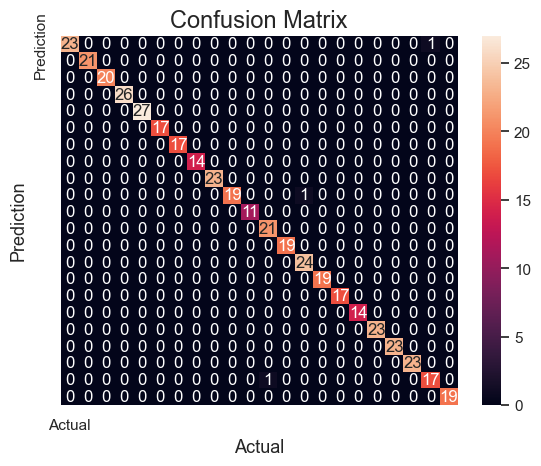

In [89]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Actual'],
            yticklabels=['Prediction'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

3)Logistic Regression

**Train Logistic Regression Model**

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [86]:
model= LogisticRegression()
model.fit(x_train,y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
y_pred=model.predict(x_test)
model.predict_proba(x_test)

array([[1.28301915e-20, 1.98626838e-08, 2.92168679e-11, ...,
        2.33616727e-12, 5.97254493e-19, 1.73951196e-01],
       [6.97583834e-21, 9.82021025e-08, 8.73864652e-11, ...,
        6.83370318e-09, 4.40013552e-13, 8.52729977e-01],
       [2.77588050e-10, 6.36109161e-03, 1.32687850e-02, ...,
        3.14394328e-03, 7.27672671e-08, 3.34194399e-07],
       ...,
       [1.70840271e-19, 7.84533879e-04, 3.19614197e-07, ...,
        3.05467487e-14, 2.61312447e-15, 8.96519979e-05],
       [3.83272096e-17, 2.33386599e-03, 9.05545462e-07, ...,
        1.16936334e-14, 3.75938816e-16, 3.43376355e-05],
       [3.56262705e-13, 2.15564945e-10, 9.14021020e-09, ...,
        2.56257594e-06, 8.68528867e-03, 1.25604479e-21]])

In [88]:
print('Accuracy Of Logistic Regression:' ,accuracy_score(y_test,y_pred))

Accuracy Of Logistic Regression: 0.7522727272727273


*Predict the Value of the CROP*

In [93]:
y_test.iloc[-1]

18

In [ ]:
#PigeonPeas:18

In [94]:
y_pred

array([15, 21, 17, 17,  0, 12,  0, 17, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 12, 15,  5, 17, 16, 12,  3,  8,  2, 16, 18,  8, 19, 10,  8, 10,
        8,  2, 20,  3,  9,  9, 12, 12, 10, 11, 17, 11,  9,  4, 15, 11,  2,
        5,  7, 14,  5, 18,  6,  0,  1,  2, 21,  4,  2, 16, 10, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 12,  1,  6, 21, 16,  5,  3,  8, 17, 16,
       12,  5, 17,  1, 19, 11, 17,  6, 17, 18,  2,  9,  6,  2, 10,  4,  8,
       16, 15, 21,  9, 15,  1, 18, 10,  1,  8,  6, 16, 18,  3, 11,  4, 19,
        8, 18,  7,  2, 16,  3,  2,  4, 11,  1, 10, 17, 18, 19,  3, 16, 16,
       12,  1,  1,  0,  1, 15, 14,  3,  4, 11,  0,  4,  9, 17, 14, 10, 21,
       14, 17, 17, 18,  9, 11,  8,  3,  0, 16,  6, 20, 16,  7, 10, 15,  7,
        7, 11, 19,  0,  4, 11, 10,  7, 21,  8, 11,  8,  9,  8,  1, 17,  1,
       18,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  0,  7,  7,  1,  6,
        8, 19, 14,  1, 20, 14, 11,  3,  3,  3,  0, 20,  9, 14,  5,  2,  9,
       12, 12, 16, 12,  0

In [96]:
model.coef_

array([[-1.51970741e-01,  1.16420984e-01,  3.19807008e-01,
        -5.30703916e-02, -2.78089560e-02, -1.32008944e-02,
        -5.64989728e-02,  3.47140418e-03, -3.26952589e-03],
       [ 1.41922863e-01,  1.03330886e-01,  1.74459011e-02,
        -1.64412504e-02, -2.17750858e-02, -8.91807593e-03,
        -3.02008305e-02, -8.20791762e-03, -7.56588800e-04],
       [ 1.49277655e-02,  1.30194168e-01, -7.04283778e-02,
         4.70056369e-02,  4.68835948e-02,  9.38989163e-03,
        -2.87863842e-02, -1.39412939e-03, -4.49354869e-04],
       [ 1.53987892e-02,  1.07956408e-01,  1.90879612e-01,
        -6.59254402e-03, -1.70011797e-01,  1.04683291e-02,
         1.92900333e-02, -2.62425052e-02, -5.43083909e-04],
       [-1.44741463e-01, -1.66809626e-01, -6.83657840e-02,
        -1.75167413e-02,  2.85918495e-02, -8.57623082e-03,
         1.41173266e-01,  1.56596807e-02,  9.61644256e-04],
       [ 1.56148978e-01, -1.37703830e-01, -8.34756331e-02,
        -2.27583868e-02, -1.30172507e-01, -4.067213

In [97]:
model.intercept_

array([-1.69668193e-03, -9.40044315e-04,  9.83680525e-04,  9.56889861e-04,
       -9.50999173e-04, -8.72953459e-04,  2.05807292e-05, -1.11386531e-03,
       -1.02053492e-03,  8.86325988e-04,  1.64432162e-03,  7.04958783e-04,
        1.48952710e-03,  1.41807734e-03,  1.15574372e-03,  3.62170999e-04,
        7.90259567e-04, -8.81951462e-04, -5.78254936e-04,  2.59532709e-04,
       -2.81278742e-03,  1.96003986e-04])

*K-Fold Cross Validation Technique*

In [98]:
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x,y,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.95912807 0.96725784 0.97544338]
Avg : 0.9672764310753091


*Using Confusion Matrix*

In [99]:
cm = confusion_matrix(y_test,y_pred)

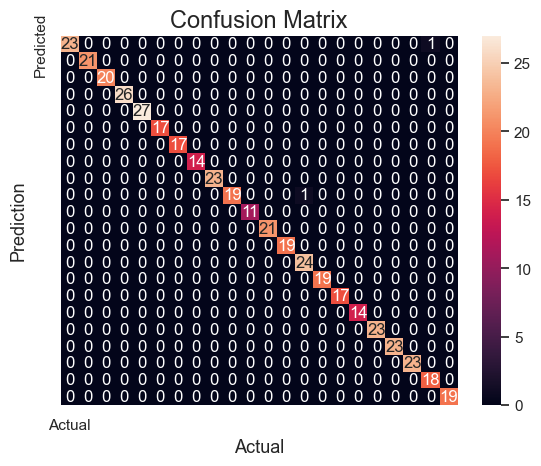

In [116]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Actual'],
            yticklabels=['Predicted'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [102]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7522727272727273


In [103]:
precision=precision_score(y_test,y_pred,average='micro')
print(precision)

0.7522727272727273


In [104]:
recall=recall_score(y_test,y_pred,average='micro')
print(recall)

0.7522727272727273


In [105]:
F1_score=f1_score(y_test,y_pred,average='micro')
print(F1_score)

0.7522727272727272


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

4)Random Forest Classification

**Train Random Forest Classification Model**

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [91]:
classifier=RandomForestClassifier( n_estimators=100,criterion='gini')
#mse=mean square error
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
classifier.predict(x_train)

array([16,  2, 10, ..., 12,  7, 10], dtype=int64)

In [106]:
classifier.score(x_test,y_test)


0.9954545454545455

*Predict the Value of the CROP*

In [95]:
y_test.iloc[-1]

18

In [96]:
#PigeonPeas:18

In [105]:
y_pred=classifier.predict(x_test)
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
       11, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 11, 18,  4, 15, 11,  2,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17, 18, 16, 20,
       15, 18, 15,  4,  8,  1,  2, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3,  2,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9, 13, 14, 10, 21,
       14, 18, 18, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4, 11, 10,  7, 21,  8,  5,  5,  9,  8, 13, 13,  1,
        9,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [107]:
y_test

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
59      20
71      20
1908     6
1958     6
482     18
Name: CROP, Length: 440, dtype: int64

*Using Confusion Matrix*

In [108]:
cm = confusion_matrix(y_test,y_pred)

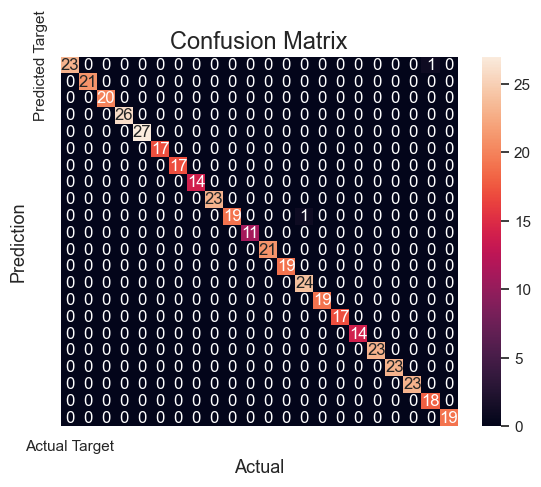

In [109]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Actual Target'],
            yticklabels=['Predicted Target'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [110]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9954545454545455


In [113]:
precision=precision_score(y_test,y_pred,average='micro')
print(precision)

0.9954545454545455


In [114]:
recall=recall_score(y_test,y_pred,average='micro')
print(recall)

0.9954545454545455


In [115]:
F1_score=f1_score(y_test,y_pred,average='micro')
print(F1_score)

0.9954545454545455


*K-Fold Cross Validation Technique*

In [111]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=3)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.95095368 1.         0.96589359]
Avg: 0.9722824221562192


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

5)K Nearest Neighbors Classification

**Train KNN Classification Model**

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
classifier=KNeighborsClassifier(n_neighbors=5)
#default = 5
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [114]:
y_pred=classifier.score(x_test,y_test)
y_pred

0.5272727272727272

*Predict the Value of the CROP*


In [115]:
x_test.iloc[-1,:]

N_SOIL            5.000000
P_SOIL           53.115473
K_SOIL           20.000000
TEMPERATURE      19.043805
HUMIDITY         33.106951
ph                6.121667
RAINFALL        155.370562
STATE            10.000000
CROP_PRICE     2700.000000
Name: 482, dtype: float64

In [116]:
classifier.predict([x_test.iloc[-1,:]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([18], dtype=int64)

In [117]:
y_test.iloc[-1,]

18

In [ ]:
#PigeonPeas:18

In [118]:
y_pred=classifier.predict(x_test)
y_pred

array([13, 13,  5, 17,  0, 12,  7, 13, 13, 10,  2, 20,  4,  8,  2, 14,  7,
       11,  4, 21,  5, 17, 16,  4,  3,  5, 13, 16,  4,  5, 19,  2,  8, 13,
        8,  2,  1,  3,  1,  2, 20, 12, 10, 11, 10,  2,  9, 19,  3,  2,  2,
       11,  7, 13,  1,  3,  6,  0,  1,  2, 21,  4, 10, 16, 10, 21, 16, 18,
       15, 18, 15, 18,  8,  3,  2,  8,  1,  6,  6, 19,  6,  1,  8,  2, 16,
        2,  5,  2,  2, 19,  6, 13,  6,  4, 18,  2,  2,  5, 10, 10,  4, 17,
       16, 15, 11,  9, 15,  1,  8, 14,  6,  8,  6, 12,  9,  3,  1,  4, 16,
       20,  3,  7,  2, 16,  3,  2,  4,  2,  1, 10,  1,  2, 19,  3,  8, 16,
        9,  2,  1,  0, 13, 14, 14, 13,  4,  5,  0,  4,  3, 13, 13,  2, 11,
        3, 16,  2,  4, 12, 11,  8,  3,  0, 16,  6,  4, 16,  7, 10, 21,  0,
        7,  2, 11,  3,  8, 11, 10,  0, 21,  8,  5,  8,  9,  5,  9, 12,  2,
        9, 16, 18,  8, 13, 12, 14, 21,  9,  2,  0,  2,  3,  7, 18,  1,  5,
        5, 19, 10,  1,  4, 14, 11,  9,  3,  3,  0,  0, 13, 13,  5,  2,  9,
       12, 12,  4,  4,  7

In [119]:
y_test

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
59      20
71      20
1908     6
1958     6
482     18
Name: CROP, Length: 440, dtype: int64

In [120]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [121]:
cm = confusion_matrix(y_test,y_pred)

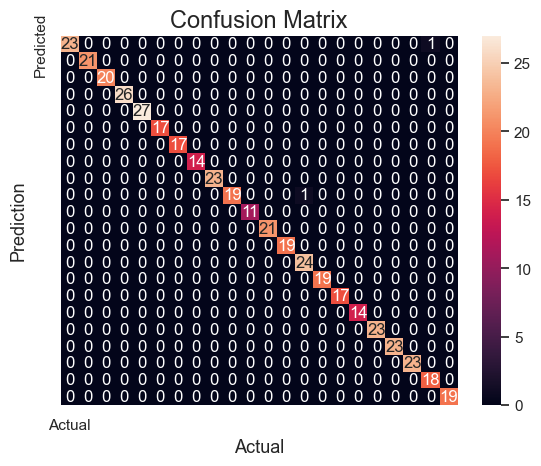

In [117]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Actual'],
            yticklabels=['Predicted'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [123]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0, 16,  2,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  3,  1,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  2,  1, 18,  0,  0,  0,  1,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0, 15,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
         3,  0,  2,  3,  1,  0],
       [ 0,  1,  0,  0,  0,  9,  1,  0,  4,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  1, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  1,  3,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1],
       [ 0,  1,  5,  2,  0,  0,  0,  0,  0,  6,  0,  0,

In [124]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.5272727272727272


In [125]:
precision=precision_score(y_test,y_pred,average='micro')
print(precision)

0.5272727272727272


In [126]:
recall=recall_score(y_test,y_pred,average='micro')
print(recall)

0.5272727272727272


In [127]:
F1_score=f1_score(y_test,y_pred,average='micro')
print(F1_score)

0.5272727272727272


*K-Fold Cross Validation Technique*

In [128]:
score_rf=cross_val_score(KNeighborsClassifier(n_neighbors=5),x,y,cv=5)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.46590909 0.525      0.48863636 0.49090909 0.49772727]
Avg: 0.49363636363636365


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**